<a href="https://colab.research.google.com/github/SarraLKSC/CIFAR10_with_Tensorflow/blob/master/CIFAR10_CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10**
This is my 2nd take on the CIFAR10 classification problem.
In my previous attempt I reached an accuracy of 68% using a simple network: 3 block of conv-pool layers. This time i will use a deeper network, recreating a VGG3 architecture 

In [0]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
class_names=['airplane' ,'automobile','bird' ,'cat','deer','dog' ,'frog' ,'horse','ship' ,'truck']

170500096/170498071 [==============================] - 13s 0us/step


[1]
automobile


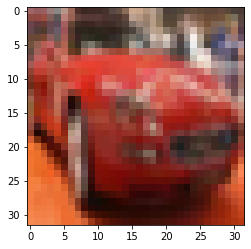

In [0]:
plt.imshow(x_train[5])
print(y_train[5])
print(class_names[int(y_train[5])])

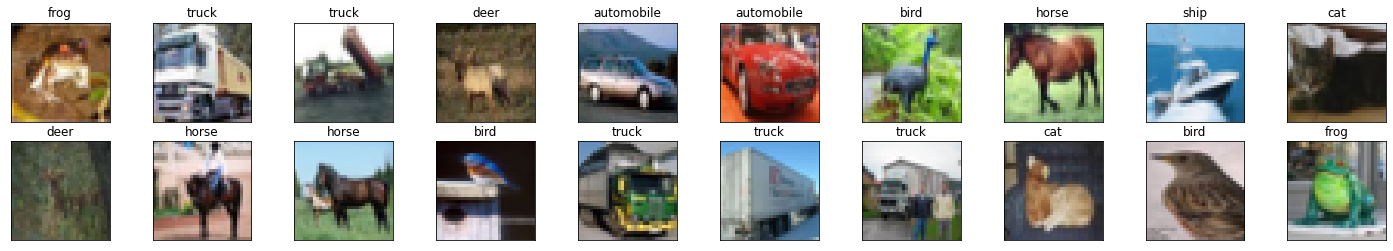

In [0]:
figure=plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax=figure.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(x_train[idx])
  ax.set_title(class_names[int(y_train[idx])])

In [0]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_train/=255
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_test=x_test.astype('float32')
x_test/=255

In [0]:
print(y_train[5])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

In [0]:
model.fit(x_train,y_train,shuffle='true',batch_size=64,epochs=100)

Epoch 1/100
782/782 [==============================] - 4s 5ms/step - loss: 2.0058 - acc: 0.2583
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.7144 - acc: 0.3711
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 1.6061 - acc: 0.4101
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 1.5197 - acc: 0.4417
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 1.4418 - acc: 0.4748
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 1.3716 - acc: 0.5009
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 1.3121 - acc: 0.5227
Epoch 8/100
782/782 [==============================] - 4s 5ms/step - loss: 1.2588 - acc: 0.5493
Epoch 9/100
782/782 [==============================] - 4s 5ms/step - loss: 1.2095 - acc: 0.5676
Epoch 10/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1676 - acc: 0.5792
Epoch 11/100
782/782 [=================

In [0]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6211 - acc: 0.7975


[0.6211456656455994, 0.7975000143051147]

# **Conclusion**
As shown above, this model hit an accuracy of 83% on the training set and 79% on the testing set. This is a major improvement from the 68% accuracy reached by the 1st model I made. We can draw many conclusions from the comparision of the 2 models, first one being that a deeper network (with multiple dropouts) can achieve better results without manifesting overfitting. 2nd is: one hot encoding can prevent the model from making false ordinal relations between labels thus increasing its accuracy.